# Завдання 1

In [4]:
source_directory = "data"
destination_directory = "my_dis"

%run copy_file.py $source_directory $destination_directory

# Завдання 2

In [1]:
from koch_curve import draw_koch_curve

In [2]:
draw_koch_curve(3)

2024-10-04 12:02:27.333 Python[68662:3403893] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


# Завдання 3

In [3]:
def hanoi(n, source, target, auxiliary):
    if n == 1:
        print(f"Move disk 1 from {source} to {target}")
        return
    hanoi(n-1, source, auxiliary, target)
    print(f"Move disk {n} from {source} to {target}")
    hanoi(n-1, auxiliary, target, source)

n = 3
hanoi(n, 'A', 'C', 'B')

Move disk 1 from A to C
Move disk 2 from A to B
Move disk 1 from C to B
Move disk 3 from A to C
Move disk 1 from B to A
Move disk 2 from B to C
Move disk 1 from A to C


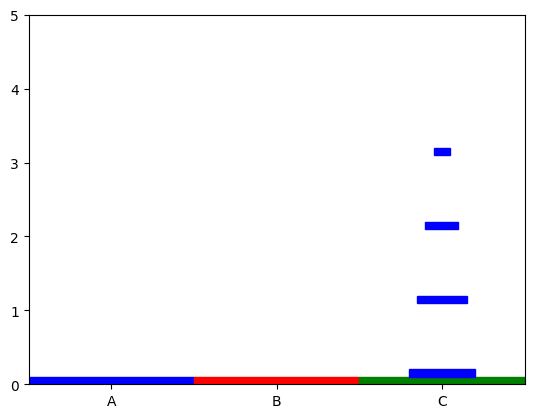

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output
import time


def draw_towers(towers, n, source, target, auxiliary):
    clear_output(wait=True)
    fig, ax = plt.subplots()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, n + 1)
    ax.set_xticks([0.5, 1.5, 2.5])
    ax.set_xticklabels(['A', 'B', 'C'])
    
    colors = ['gray', 'gray', 'gray']
    colors[source] = 'red'
    colors[target] = 'green'
    colors[auxiliary] = 'blue'
    
    for i in range(3):
        ax.add_patch(patches.Rectangle((i, 0), 1, 0.1, color=colors[i]))
        for j in range(len(towers[i])):
            disk = towers[i][j]
            ax.add_patch(patches.Rectangle((i + 0.5 - disk / 20, j + 0.1), disk / 10, 0.1, color='blue'))
    
    plt.show()
    time.sleep(2)

def hanoi(n, source, target, auxiliary, towers):
    if n == 1:
        towers[target].append(towers[source].pop())
        draw_towers(towers, len(towers[0]) + len(towers[1]) + len(towers[2]), source, target, auxiliary)
        return
    hanoi(n-1, source, auxiliary, target, towers)
    towers[target].append(towers[source].pop())
    draw_towers(towers, len(towers[0]) + len(towers[1]) + len(towers[2]), source, target, auxiliary)
    hanoi(n-1, auxiliary, target, source, towers)

n = 5
towers = [list(range(n, 0, -1)), [], []]
draw_towers(towers, n, 0, 2, 1)
hanoi(n, 0, 2, 1, towers)

Зцієї візуалізації видно як найменший диск постійно переміщаєтся з права на ліво при непарній кількості дисків кожен другий хід. В свою чергу другий найменший диск серед незаблокованих дисків також робить хід кожен другий раз на незаблоковане місце